# SALES DATA ANALYSIS

This analysis report provides a detailed overview of the store’s performance based on four datasets:

1. Product-wise sales

2. Category-level sales

3. Daily sales trends

4. Payment method distribution

                This report analyzes product sales, category performance, daily revenue trends, and payment method distribution. It highlights top-selling items, identifies slow-moving products, and reviews customer payment behavior across cash, Mada, and delivery platforms. The analyse support better inventory management, better decisions, staffing, and operational planning to improve overall business performance.

In [77]:
# for path access
import os
os.path.abspath("")

'C:\\Users\\asus'

In [78]:
# python libraries for handling datasets
import pandas as pd
import numpy as np

In [79]:
# read 4 datasets
product = pd.read_excel("Products.xlsx")
category = pd.read_excel("Category.xlsx")
daily_sales = pd.read_excel("Daily sales.xlsx")
payment = pd.read_excel("Payment.xlsx")

In [80]:
product.head(10)

,Code,Products,Quantity,Total without Tax,Total
0,2,Pizza Chicken Ranch Big,83,2050.0,2050.0
1,5,Pizza Pepperoni Big,19,475.0,475.0
2,1,Pizza Alfredo Big,17,425.0,425.0
3,3,Pizza Chicken Ranch Spicy Big,14,350.0,350.0
4,4,Pizza Chicken Bbq Big,11,275.0,275.0
5,6,Pizza Margherita Big,15,330.0,330.0
6,7,Pizza Vegetable Big,35,770.0,770.0
7,8,Pizza Aish Albulbul Big,9,198.0,198.0
8,19,Fahita Chicken Fatira Big,282,2820.0,2820.0
9,29,Muhammara Fatira Big,66,462.0,462.0


In [81]:
category.head(5)

,Product Group,Quantity,Total without tax,Total
0,Delivery Aps,3555,22751.0,22751.0
1,Pezza,1045,18979.0,18979.0
2,Bread,5797,4898.5,4898.5
3,Side Requests,182,1239.0,1239.0
4,Fatayer,5873,24515.8,24515.8


In [82]:
daily_sales.head(10)

,Total,Date
0,322.5,01/07/1446
1,487.0,02/07/1446
2,307.0,03/07/1446
3,629.5,04/07/1446
4,488.0,05/07/1446
5,353.0,06/07/1446
6,414.0,07/07/1446
7,395.5,08/07/1446
8,448.0,09/07/1446
9,143.0,10/07/1446


In [83]:
payment.head(10)

,Date,Toyou,Jahez,Cash,Mada,Mrsool,Ninja,Hungar,Total
0,2025-01-01,131.5,NaN,46.5,144.5,NaN,NaN,NaN,322.5
1,2025-01-02,36.0,NaN,99.5,170.0,NaN,181.5,NaN,487.0
2,2025-01-03,NaN,NaN,45.0,233.5,NaN,28.5,0.0,307.0
3,2025-01-04,124.5,NaN,106.5,374.5,NaN,24.0,NaN,629.5
4,2025-01-05,NaN,NaN,45.5,405.5,NaN,37.0,NaN,488.0
5,2025-01-06,NaN,NaN,122.0,192.0,NaN,39.0,NaN,353.0
6,2025-01-07,63.0,NaN,86.0,265.0,NaN,NaN,NaN,414.0
7,2025-01-08,49.0,NaN,86.5,260.0,NaN,NaN,NaN,395.5
8,2025-01-09,35.5,NaN,173.0,196.5,NaN,43.0,NaN,448.0
9,2025-01-10,NaN,NaN,48.0,95.0,NaN,NaN,NaN,143.0


In [84]:
# behaviour of the datas
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               116 non-null    int64  
 1   Products           116 non-null    object 
 2   Quantity           116 non-null    int64  
 3   Total without Tax  116 non-null    float64
 4   Total              116 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 4.7+ KB


In [85]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product Group      8 non-null      object 
 1   Quantity           8 non-null      int64  
 2   Total without tax  8 non-null      float64
 3   Total              8 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 388.0+ bytes


In [86]:
daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   273 non-null    float64
 1   Date    273 non-null    object 
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


In [87]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    273 non-null    datetime64[ns]
 1   Toyou   79 non-null     float64       
 2   Jahez   3 non-null      float64       
 3   Cash    273 non-null    float64       
 4   Mada    273 non-null    float64       
 5   Mrsool  10 non-null     float64       
 6   Ninja   125 non-null    float64       
 7   Hungar  157 non-null    float64       
 8   Total   273 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 19.3 KB


In [88]:
product.describe()

,Code,Quantity,Total without Tax,Total
count,116.000000,116.000000,116.000000,116.000000
mean,59.068966,205.017241,852.138362,852.138362
std,34.338146,525.708019,1422.567995,1422.567995
min,1.000000,1.000000,1.000000,1.000000
25%,29.750000,21.500000,189.000000,189.000000
50%,58.500000,67.500000,402.500000,402.500000
75%,88.250000,173.250000,810.637500,810.637500
max,119.000000,4420.000000,11251.750000,11251.750000


In [89]:
category.describe()

,Quantity,Total without tax,Total
count,8.000000,8.000000,8.000000
mean,2972.750000,12356.006250,12356.006250
std,2361.654066,9108.153093,9108.153093
min,182.000000,1239.000000,1239.000000
25%,844.500000,5331.625000,5331.625000
50%,2967.500000,10494.375000,10494.375000
75%,4979.500000,19922.000000,19922.000000
max,5873.000000,24515.800000,24515.800000


In [90]:
daily_sales.describe()

,Total
count,273.000000
mean,362.080769
std,139.130003
min,25.500000
25%,265.000000
50%,350.000000
75%,443.500000
max,878.500000


In [91]:
payment.describe()

,Date,Toyou,Jahez,Cash,Mada,Mrsool,Ninja,Hungar,Total
count,273,79.000000,3.000000,273.000000,273.000000,10.000000,125.000000,157.000000,273.000000
mean,2025-05-17 00:00:00,50.727848,38.333333,71.776557,206.736447,47.350000,47.812000,77.971338,362.080769
min,2025-01-01 00:00:00,6.000000,13.000000,-4.000000,5.000000,2.000000,17.000000,0.000000,25.500000
25%,2025-03-10 00:00:00,21.750000,20.500000,44.000000,149.500000,26.375000,24.000000,32.500000,265.000000
50%,2025-05-17 00:00:00,38.500000,28.000000,65.000000,204.500000,36.000000,37.000000,60.000000,350.000000
75%,2025-07-24 00:00:00,70.500000,51.000000,99.000000,248.500000,70.375000,59.000000,103.000000,443.500000
max,2025-09-30 00:00:00,200.500000,74.000000,236.000000,461.500000,116.000000,181.500000,371.500000,878.500000
std,NaN,40.545701,31.785741,41.219022,82.020666,35.187632,33.193814,69.236432,139.107712


In [92]:
# checking the null values 
payment.isnull().sum()

Date        0
Toyou     194
Jahez     270
Cash        0
Mada        0
Mrsool    263
Ninja     148
Hungar    116
Total       0
dtype: int64

In [93]:
payment.columns

Index(['Date', 'Toyou', 'Jahez', 'Cash', 'Mada', 'Mrsool', 'Ninja', 'Hungar',
       'Total'],
      dtype='object')

In [94]:
columns = list(payment)

In [95]:
columns

['Date',
 'Toyou',
 'Jahez',
 'Cash',
 'Mada',
 'Mrsool',
 'Ninja',
 'Hungar',
 'Total']

In [96]:
# checking how may 0's
(payment[columns[:]] == 0).sum()

Date      0
Toyou     0
Jahez     0
Cash      0
Mada      0
Mrsool    0
Ninja     0
Hungar    3
Total     0
dtype: int64

In [97]:
# for better analysis we have to replace null values in to 0's or valid values
payment[columns[:]] = payment[columns[:]].replace(np.nan,0)

In [99]:
# now we have no null values
payment.isnull().sum()

Date      0
Toyou     0
Jahez     0
Cash      0
Mada      0
Mrsool    0
Ninja     0
Hungar    0
Total     0
dtype: int64

In [100]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    273 non-null    datetime64[ns]
 1   Toyou   273 non-null    float64       
 2   Jahez   273 non-null    float64       
 3   Cash    273 non-null    float64       
 4   Mada    273 non-null    float64       
 5   Mrsool  273 non-null    float64       
 6   Ninja   273 non-null    float64       
 7   Hungar  273 non-null    float64       
 8   Total   273 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 19.3 KB


In [101]:
total_sales = product['Total'].sum()

In [102]:
total_sales

98848.05

Total sales is 98848.05

In [105]:
# Highest revenue products
top_products = product.groupby('Products')['Total'].sum().sort_values(ascending=False).head(10)

In [106]:
top_products

Products
Falafel Sandwich               12289.75
Falafel Fatira Big              6130.00
Pizza Chicken Ranch Mid         5988.00
Mini Fatayer Big                4982.00
Soft Drink                      4710.00
Bread Saj 3 Pieces              4420.00
Pizza Vegetable Mid             3744.00
Mini Fatayer Mid                3717.00
Fahita Chicken Fatira Big       3406.50
Fahita Chicken Fatira Small     3309.50
Name: Total, dtype: float64

top selling product falafel sandwitch with 12289.75

In [107]:
# for visualization
import matplotlib.pyplot as plt

In [132]:
top_products = product.groupby('Products')['Total'].sum().sort_values(ascending=False).head(5)

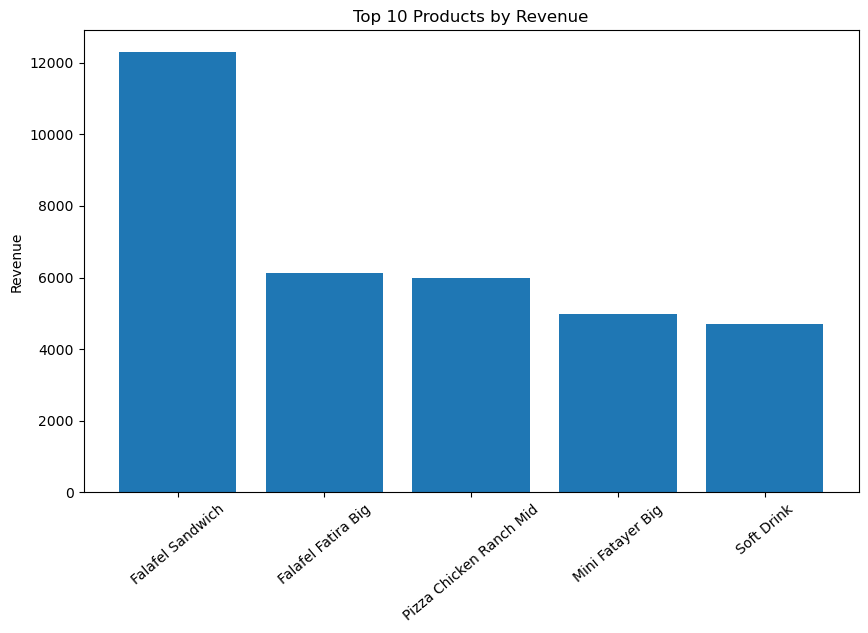

In [134]:
plt.figure(figsize=(10,6))
plt.bar(top_products.index, top_products.values)
plt.title("Top 10 Products by Revenue")
plt.xticks(rotation=40)
plt.ylabel("Revenue")
plt.show()

In [117]:
# Top selling products
top_qty = product.groupby("Products")["Quantity"].sum().sort_values(ascending=False).head(10)

In [118]:
print(top_qty.head(10))

Products
Bread Saj 3 Pieces             4420
Falafel 3 Pieces               2458
Falafel Sandwich               2450
Soft Drink                     1532
Bread Meat Small               1164
Falafel Fatira Big             1013
Fahita Chicken Fatira Small     919
Liquid Cheese Fatira Small      634
Falafel Fatira Small            625
Juice                           597
Name: Quantity, dtype: int64


Bread Saj 3 Pieces is the top selling by quantity with 4420

In [130]:
top_qty = product.groupby("Products")["Quantity"].sum().sort_values(ascending=False).head(5)

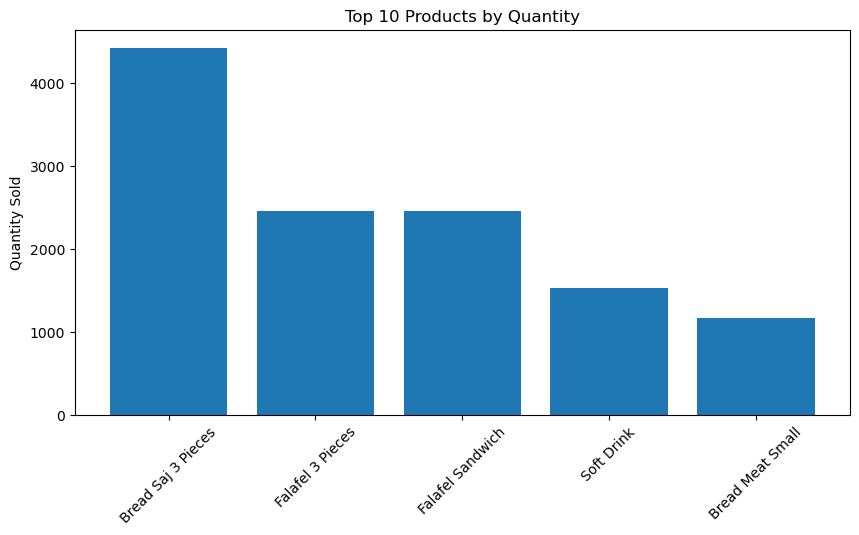

In [131]:
plt.figure(figsize=(10,5))
plt.bar(top_qty.index, top_qty.values)
plt.title("Top 10 Products by Quantity")
plt.xticks(rotation=45)
plt.ylabel("Quantity Sold")
plt.show()

In [127]:
# Total revenue per category
category_revenue = category.groupby("Product Group")["Total"].sum().sort_values(ascending=False)

In [128]:
category_revenue

Product Group
Fatayer          24515.80
Delivery Aps     22751.00
Pezza            18979.00
Falafel          15365.75
Mini Fatayer      5623.00
Drinks            5476.00
Bread             4898.50
Side Requests     1239.00
Name: Total, dtype: float64

top selling product category is Fatayer with 24515.80

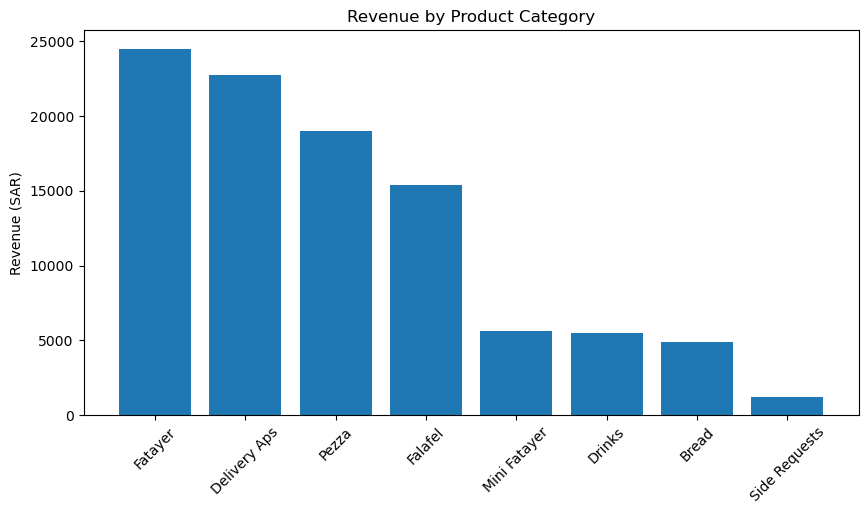

In [129]:
plt.figure(figsize=(10,5))
plt.bar(category_revenue.index, category_revenue.values)
plt.title("Revenue by Product Category")
plt.xticks(rotation=45)
plt.ylabel("Revenue (SAR)")
plt.show()

In [135]:
# Total quantity per category
category_qty = category.groupby("Product Group")["Quantity"].sum().sort_values(ascending=False)

In [136]:
print(category_qty)

Product Group
Fatayer          5873
Bread            5797
Falafel          4707
Delivery Aps     3555
Drinks           2380
Pezza            1045
Mini Fatayer      243
Side Requests     182
Name: Quantity, dtype: int64


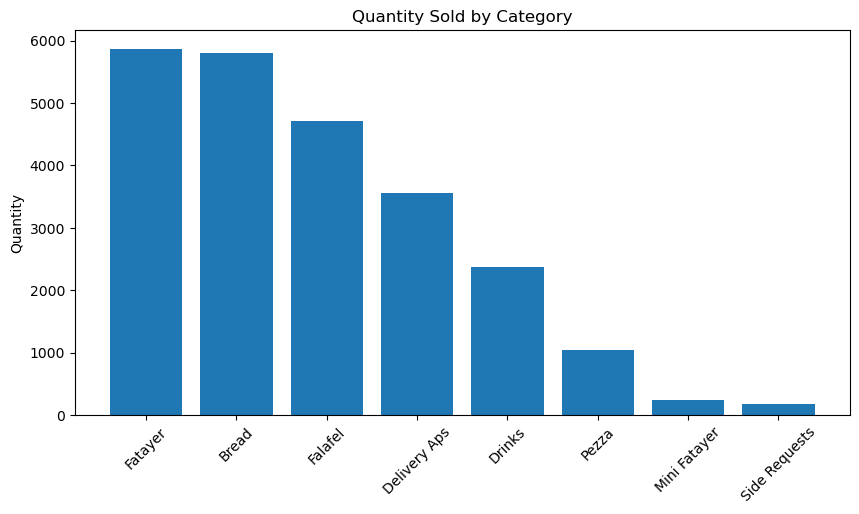

In [137]:
plt.figure(figsize=(10,5))
plt.bar(category_qty.index, category_qty.values)
plt.title("Quantity Sold by Category")
plt.xticks(rotation=45)
plt.ylabel("Quantity")
plt.show()

In [138]:
total_qty_products = category["Quantity"].sum()

In [139]:
total_qty_products

23782

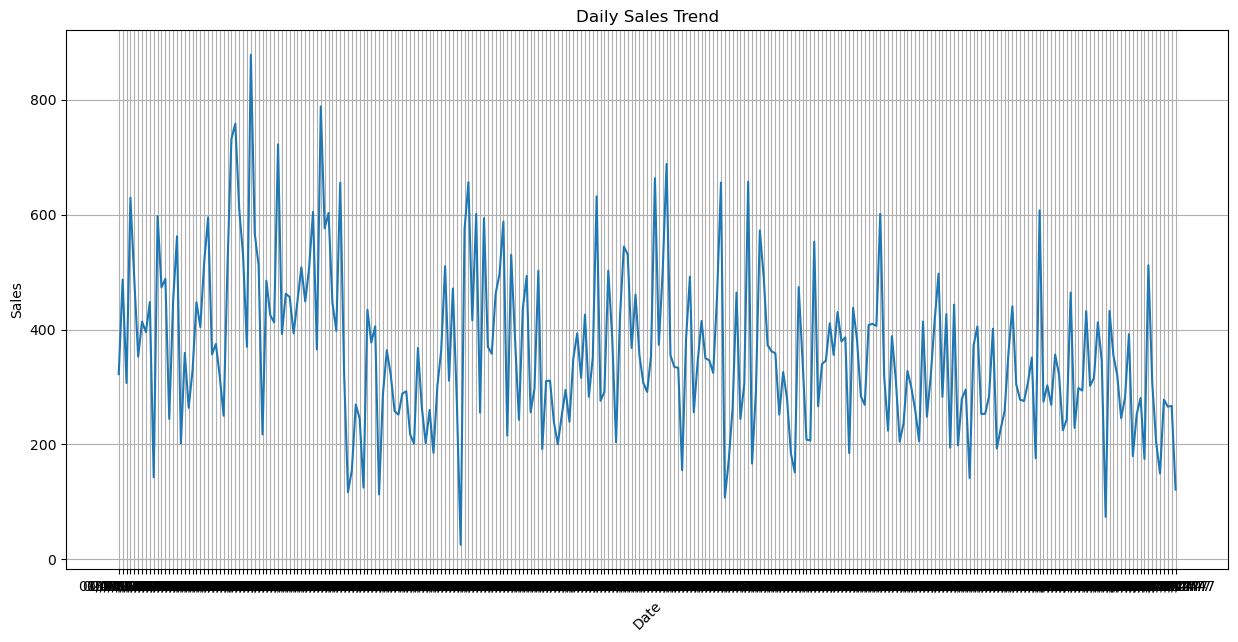

In [144]:
plt.figure(figsize=(15,7))
plt.plot(daily_sales["Date"], daily_sales["Total"])
plt.title("Daily Sales Trend")
plt.xlabel("Date",rotation=45)
plt.ylabel("Sales")
plt.grid(True)
plt.show()

In [145]:
payment_methods = payment[["Toyou","Jahez","Cash","Mada","Mrsool","Ninja","Hungar"]].sum().sort_values(ascending=False)

In [146]:
payment_methods

Mada      56439.05
Cash      19595.00
Hungar    12241.50
Ninja      5976.50
Toyou      4007.50
Mrsool      473.50
Jahez       115.00
dtype: float64

mada is the most used payment method

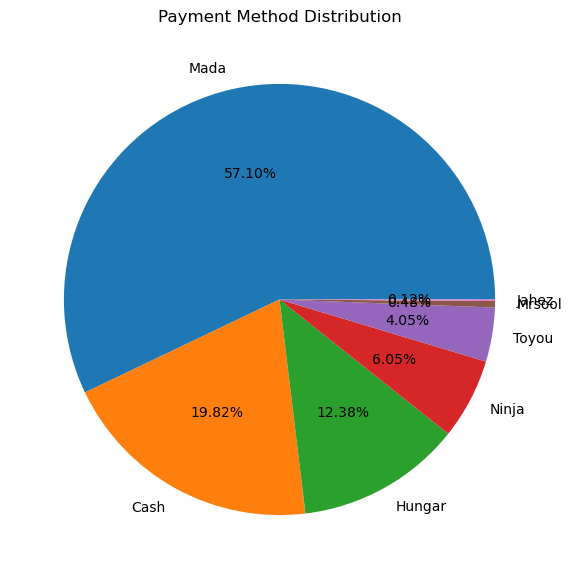

In [152]:
payment_methods.plot(kind="pie", autopct='%1.2f%%', figsize=(7,7))
plt.title("Payment Method Distribution")
plt.show()

In [153]:
category_revenue = top_category

In [154]:
summary = {
    "Total Sales": total_sales,
    "Top Product": top_products.index[0],
    "Top Category": top_category.index[0],
    "Most Used Payment Method": payment_methods.idxmax()
}

In [155]:
summary

{'Total Sales': 98848.05,
 'Top Product': 'Falafel Sandwich',
 'Top Category': 'Fatayer',
 'Most Used Payment Method': 'Mada'}

here is the small summary of this analysis:

Total Sales': 98848.05,

Top Product': 'Falafel Sandwich',

Top Category': 'Fatayer',

Most Used Payment Method': 'Mada

In [158]:
# for month sales trent analysis
payment["Date"] = pd.to_datetime(payment["Date"])

In [159]:
print(payment.head())

        Date  Toyou  Jahez   Cash   Mada  Mrsool  Ninja  Hungar  Total
0 2025-01-01  131.5    0.0   46.5  144.5     0.0    0.0     0.0  322.5
1 2025-01-02   36.0    0.0   99.5  170.0     0.0  181.5     0.0  487.0
2 2025-01-03    0.0    0.0   45.0  233.5     0.0   28.5     0.0  307.0
3 2025-01-04  124.5    0.0  106.5  374.5     0.0   24.0     0.0  629.5
4 2025-01-05    0.0    0.0   45.5  405.5     0.0   37.0     0.0  488.0


In [160]:
payment["Month"] = payment["Date"].dt.month
monthly_sales = payment.groupby("Month")["Total"].sum()
print(monthly_sales)

Month
1    13230.75
2    14112.50
3     8845.25
4    11252.00
5    12284.00
6    10220.00
7    10709.50
8     9537.00
9     8657.05
Name: Total, dtype: float64


Most sales perfomed month is 2nd month and very low slaes performed on the 3rd and 9th months as compared to 1st and 2nd month and rest of the other

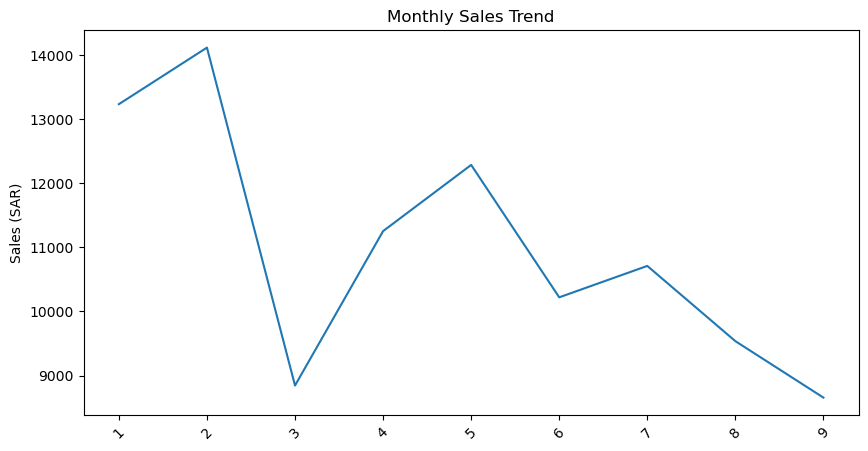

In [161]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values)
plt.title("Monthly Sales Trend")
plt.ylabel("Sales (SAR)")
plt.xticks(rotation=45)
plt.show()

In [162]:
# Best and worst sales days
best_day = payment.loc[payment["Total"].idxmax()]
worst_day = payment.loc[payment["Total"].idxmin()]

In [163]:
# Percentage contribution
payment_percentage = (payment_methods / payment_methods.sum()) * 100

In [164]:
payment_percentage

Mada      57.096776
Cash      19.823355
Hungar    12.384159
Ninja      6.046149
Toyou      4.054202
Mrsool     0.479018
Jahez      0.116340
dtype: float64

In [165]:
payment_cols = ["Toyou","Jahez","Cash","Mada","Mrsool","Ninja","Hungar"]
payment_totals = payment[payment_cols].sum()

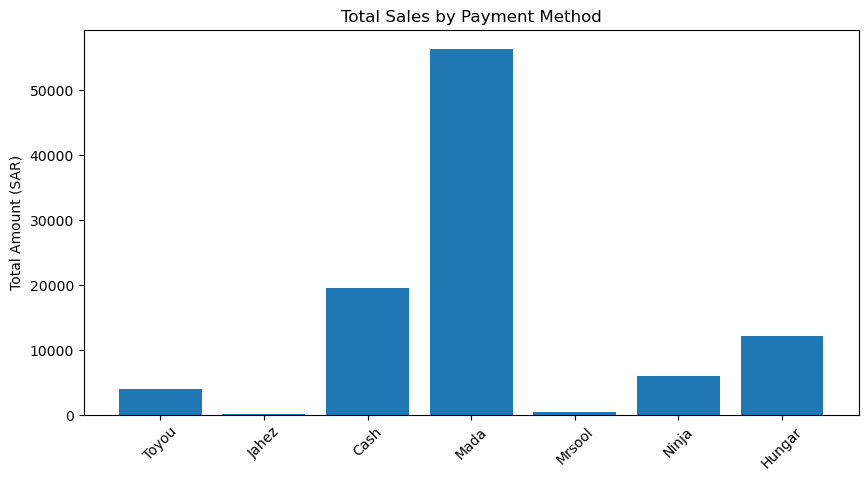

In [166]:
plt.figure(figsize=(10,5))
plt.bar(payment_totals.index, payment_totals.values)
plt.title("Total Sales by Payment Method")
plt.xticks(rotation=45)
plt.ylabel("Total Amount (SAR)")
plt.show()

In [167]:
TOTAL_REVENUE = total_sales
TOTAL_QUANTITY = total_qty_products

In [171]:
# FINAL REPORT

print("\n==============================")
print("       SALES REPORT      ")
print("==============================\n")

print("📌 TOTAL REVENUE       :", round(TOTAL_REVENUE,2))
print("📌 TOTAL QUANTITY SOLD :", TOTAL_QUANTITY)

print("\n---- TOP 5 PRODUCTS BY QUANTITY ----")
print(top_qty.head(5))

print("\n---- TOP 5 PRODUCTS BY REVENUE ----")
print(top_products.head(10))

print("\n---- CATEGORY REVENUE ----")
print(category_revenue)

print("\n---- CATEGORY QUANTITY ----")
print(category_qty)

print("\n---- MONTHLY SALES ----")
print(monthly_sales)

print("\n BEST SALES DAY:")
print(best_day)

print("\n WORST SALES DAY:")
print(worst_day)

print("\n---- PAYMENT METHOD TOTALS ----")
print(payment_methods)

print("\n---- PAYMENT METHOD PERCENTAGE ----")
print(payment_percentage)

print("\n==============================")
print("        END OF REPORT")
print("==============================")


       SALES REPORT      

📌 TOTAL REVENUE       : 98848.05
📌 TOTAL QUANTITY SOLD : 23782

---- TOP 5 PRODUCTS BY QUANTITY ----
Products
Bread Saj 3 Pieces    4420
Falafel 3 Pieces      2458
Falafel Sandwich      2450
Soft Drink            1532
Bread Meat Small      1164
Name: Quantity, dtype: int64

---- TOP 5 PRODUCTS BY REVENUE ----
Products
Falafel Sandwich           12289.75
Falafel Fatira Big          6130.00
Pizza Chicken Ranch Mid     5988.00
Mini Fatayer Big            4982.00
Soft Drink                  4710.00
Name: Total, dtype: float64

---- CATEGORY REVENUE ----
Product Group
Fatayer         24515.80
Delivery Aps    22751.00
Pezza           18979.00
Falafel         15365.75
Mini Fatayer     5623.00
Name: Total, dtype: float64

---- CATEGORY QUANTITY ----
Product Group
Fatayer          5873
Bread            5797
Falafel          4707
Delivery Aps     3555
Drinks           2380
Pezza            1045
Mini Fatayer      243
Side Requests     182
Name: Quantity, dtype: int64



# insights

Focus marketing and stock priority on top 10 products

Apply discounts or bundle offers for products with low movement

Increase staff or stock during peak sales days

Give offers during low-performing days to improve sales

Plan marketing campaigns during high-demand periods.